<a href="https://colab.research.google.com/github/prbocca/meli_ds/blob/main/meli_ds_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Science challenge 

El desafío consta de 5 ejercicios independientes que van desde análisis exploratorio, machine learning o el diseño de una solución de data science.

¿Qué evaluamos?
El desafío busca evaluar distintos aspectos como:
* Capacidad analitica y exploración de datos
* Visualización de resultados
* Conocimientos de técnicas de generación de features y modelado
* Análisis de performance
* Buenas prácticas de desarrollo
* Diseño e implementación de Machine learning en producción

Algunas reglas y recomendaciones:
1. Si bien son 5 ejercicios dejamos a elección del postulante cuales resolver salvo
por el primero que es obligatorio como parte del desafío.
2. Un número recomendado a resolver son 3 de los 5 desafíos, pero sentite libre
de resolver la cantidad deseada.
3. La mayoría de los ejercicios se piden resolver en Jupyter notebooks y te
recomendamos subirlas a un repositorio de GitHub público para compartir los
resultados.
4. No dejes de hacernos preguntas sobre cualquier duda con los enunciados

El desafío se analiza de acuerdo al seniority del postulante y teniendo en cuenta también las necesidades particulares de la posición.

# 5. Discovery: Exploración VS Explotación

## Descripción

Durante las campañas comerciales como el black friday o el cyber monday los listados de publicaciones como el que muestra esta captura

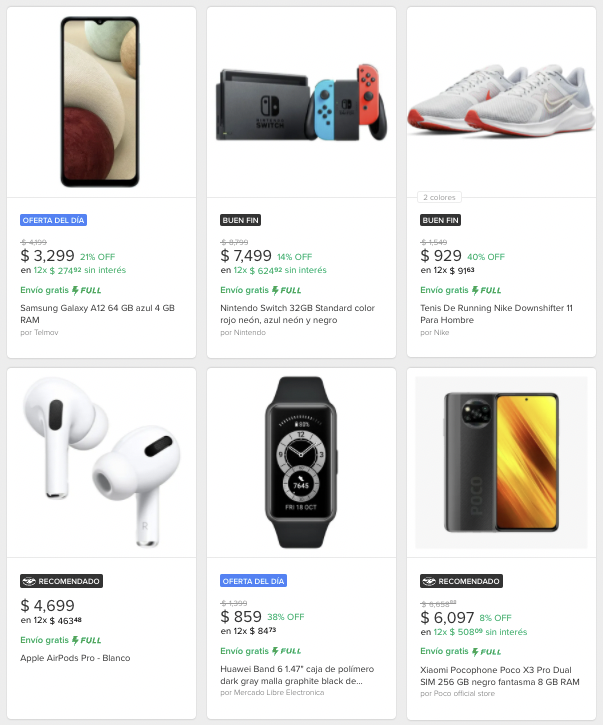

buscan exponer a los usuarios variedades de publicaciones permitiendo el discovery de buenas ofertas o productos. Otro ejemplo de un listado como estos es la sección de ofertas o por ejemplo los carruseles de recomendaciones en las páginas de producto.

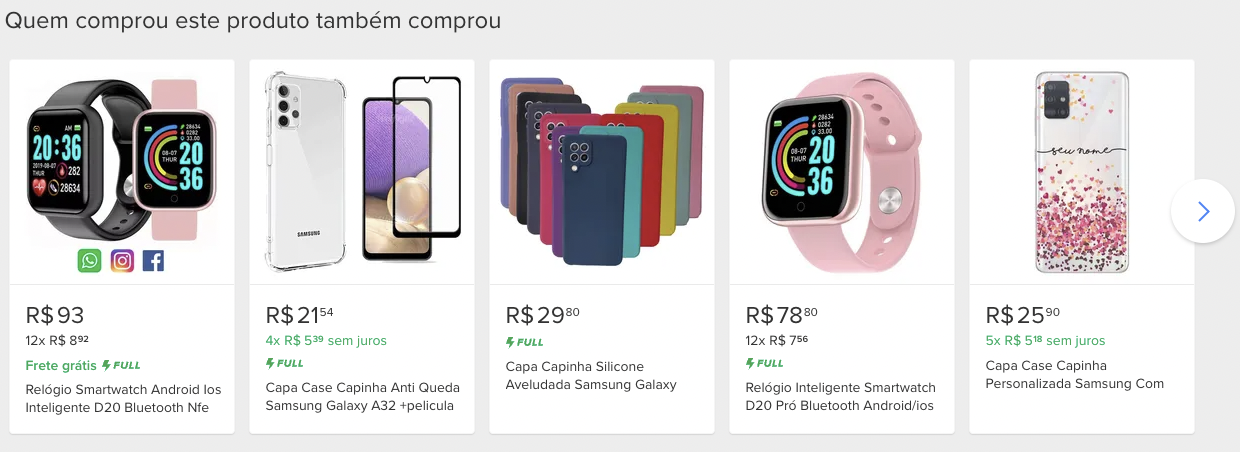

**Un problema interesante para estos listados es el de tener un buen mix entre
exploración y explotación en las recomendaciones o en el ordenamiento.**.

Donde por **explotación** nos referimos a colocar en las primeras posiciones productos que sabemos funcionan bien en estas posiciones, mientras que **explorar** refiere a colocar productos que todavía no sabemos cómo van a performar pero son buenos candidatos. El desafío es diseñar un sistema que mediante la interacción en producción con los usuarios nos permita definir en cuantas posiciones del ordenamiento queremos explorar y en cuantas explotar. La imagen de abajo refleja este problema.

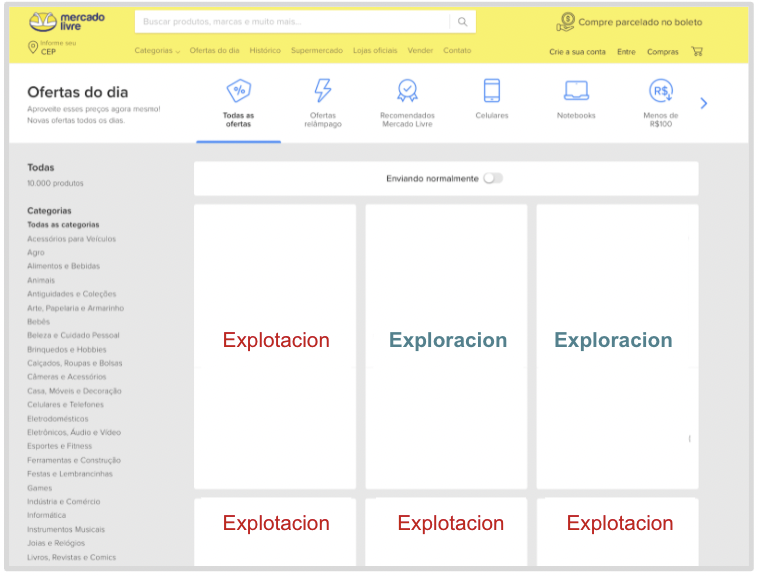

## Entregable

Para este challenge te proponemos hacer un diseño y propuesta de experimentación
en producción y te dejamos algunas preguntas a modo de guia:
* ¿Que tipo de enfoque utilizar para definir en que % de posiciones explorar y en
que % explotar?
* ¿Qué métrica usarías para medir este experimento?
* ¿Cómo aprovecharías la interacción y el feedback de los usuarios?



# Solución

## La idea

El problema de encontrar un buen mix entre explotación y exploración puede ser resuelto en forma experimental mediante **testeo A/B**. Realizar dos propuestas de mix posibles, mostrarle cada una de ellas a un conjunto suficiente y estadísticamente equivalente de usuarios, y evaluar su calidad.

Dado que el objetivo final de definir el mejor mix sería maximizar las ventas, entonces la métrica principal serían las **conversiones de impresiones a ventas**. La métrica principal con la que evaluar la calidad de los resultados experimentales sería eso: la conversión a ventas concretas.
Otras métricas serían de ayuda para entender el comportamiento y las acciones de los usuarios. Y sería bueno también tenerlas para aprender y entender aún más los resultados de los experimentos en producción. Por ejemplo, si hace **click** en alguna de las ofertas, el **tiempo** que está en ellas, posición de la página y puntero, tiempos de navegabilidad en general, etc. Estás métricas pueden ayudar a comprender mejor las razones de las conversiones, y a diseñar siguientes mejores experimentos. Observación: si existieran limitantes en la cantidad de impresiones para este experimento, podríamos utilizar una métrica más directa como los clicks, pero claramente en este caso nuestra conclusiones se limitarían al mix que genera mayor interés y no mayores ventas.

En los resultados experimentales de este problema influyen muchos factores, al menos:
* La **idoneidad** de cada oferta concreta para el usuario. Tanto para las ofertas de explotación cómo de explotación, que tan acertado es nuestro modelo de presunción de interés (que tan bien conocemos este caso particular de usuario e item).
* La **posición** concreta en la página de cada oferta, y en particular de cada tipo de oferta en el mix. Es sabido que hay posiciones más exitosas que otras, por tanto más que porcentaje de mix sería bueno medir cómo convierte cada posición según explotación o exploración. 
* El tipo de campaña comercial, supongo la propensión a explorar es más alta en campañas relacionadas a regalos (ej. día de la madre), que las incluidas como recomendaciones en una compra.

Por tanto, y dado que seguramente estos factores extras influyan en gran medida en los resultados, nuestras conclusiones deben ser muy cuidadosas, y si solo nos interesa el porcentaje de mix vs. porcentaje de conversiones los experimentos deberían ser muchos para contemplar eliminar lo más posible estos otros factores. 


Finalmente vale aclarar que esta definición (porcentaje de mix) debe enmarcarse como mejora continua. A medida que se dispongan de mejores modelos de idoneidad de las ofertas y mejores modelos de efectividad de cada posición de oferta, será posible ir refinando este porcenaje, haciendo menos experimentos y más acertados. Pero, parece siempre imprescindible experimentar porque seguramente siempre se sufran cambios que condiciones este porcentaje de mix.

## Propuesta
Tenemos la intención de realizar una propuesta concreta de experimentación, la cual seguramente pueda ser muy mejorada si se conociera más detalle sobre la realidad particular de MELI en este tema. Por tanto, simplemente debe ser tomada como una guía para explicar el procedimiento.

1. Fijamos dos posibles mix objetivos. Sin mayor conocimiento podríamos decir: escenario A) 10% exploración, y escenario B) 20% exploración.
2. Defnimos una propuesta concreta de posiciones de ofertas para cada escenario. Recordar que estas posiciones afectan mucho los resultados del experimento, y por tanto, las conclusiones están condicionadas a las mismas.
3. Programamos y ponemos en producción ambos escenarios, y derivamos aleatoriamente a los usuarios entre ambos.
4. Monitoremos el experimento y sus resultados parciales hasta el momento.
5. Cuando se tenga significancia estadística sobre los resultados terminar el experimento, y quedarse en producción con el mejor escenario. 

La parte estadística puede realizarse de distintas formas, aquí un documento que tuve que desarrollar hace un tiempo para un caso similar: https://github.com/prbocca/meli_ds/blob/main/20221028_ABtesting_GoogleOptimize.pdf



